<a href="https://colab.research.google.com/github/dparaujo/Mineracao_Dados/blob/main/Trabalho_Minera%C3%A7%C3%A3o_de_Dados_David_Araujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho de Mineração de Dados (EDA)

**Dataset:** BBC News


*   https://www.kaggle.com/datasets/gpreda/bbc-news
*   https://www.kaggle.com/code/gpreda/bbc-news-rss-feeds
*   https://www.kaggle.com/datasets/pariza/bbc-news-summary/data
*   https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

Outros datasets:

*   https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification/code
*   https://www.kaggle.com/c/learn-ai-bbc/overview
*   https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
*   https://www.kaggle.com/datasets/sahilkirpekar/bbcnews-dataset
*   https://www.kaggle.com/code/warcoder/chromadb-semantic-search
*   https://www.kaggle.com/code/anubhavgoyal10/getting-started-with-hugging-face
*   https://www.kaggle.com/datasets/khushikyad001/fake-news-detection/data
*   https://www.kaggle.com/datasets/mahdimashayekhi/fake-news-detection-dataset
*   https://github.com/payamesfandiari/fake_news_finder
*   https://www.kaggle.com/code/asif00/text-generation-with-tensorflow-nlp-rnn




### ***Alguns Testes:***

1. Preparação do Ambiente (Google Colab).
Instalando e importando as bibliotecas necessárias:

In [ ]:
# Instalação das bibliotecas
!pip install pandas numpy seaborn matplotlib wordcloud nltk sentence-transformers faiss-cpu
# !pip install openai # opcional se quiser usar API da OpenAI


In [ ]:
!pip install openai==0.28

In [ ]:
# from google.colab import userdata
# userdata.get('HF_TOKEN')

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from sentence_transformers import SentenceTransformer
import faiss

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Carregamento e Inspeção do Dataset BBC News.
Dataset diretamente do Kaggle ou de outro link direto:

In [ ]:
# Exemplo com URL direta do CSV
url = "https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv"
df = pd.read_csv(url)

# Primeiras linhas
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


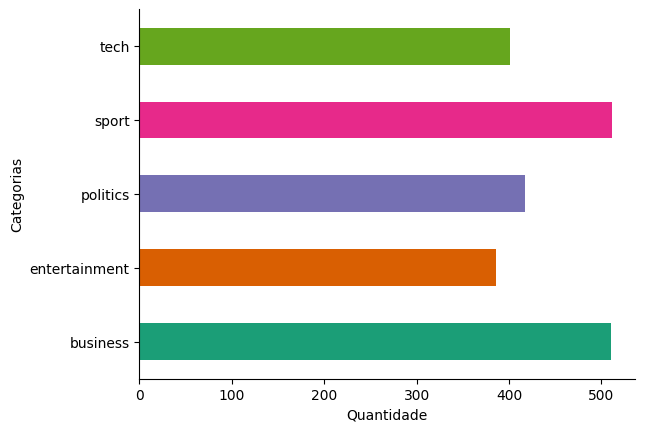

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Quantidade')
plt.ylabel('Categorias')
plt.savefig('category.png', bbox_inches='tight', dpi=600)

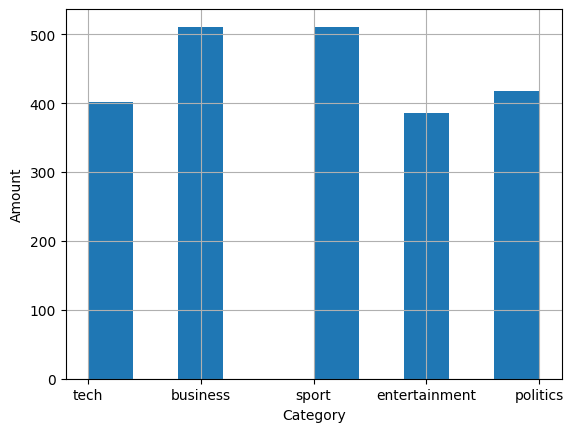

In [ ]:
# Plotando um histograma

df["category"].hist()

plt.xlabel('Category')
plt.ylabel('Amount')
plt.savefig('category-histograma.png', bbox_inches='tight', dpi=600)

In [ ]:
df


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


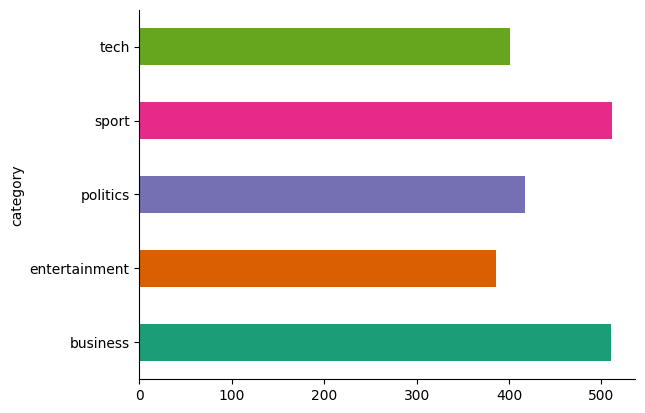

In [ ]:
# @title category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(2225, 2)

In [ ]:
df.size

4450

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
# df.mean()
# df.max()
# df.min()

3. Análise Exploratória de Dados (EDA).

a) Distribuição das Categorias

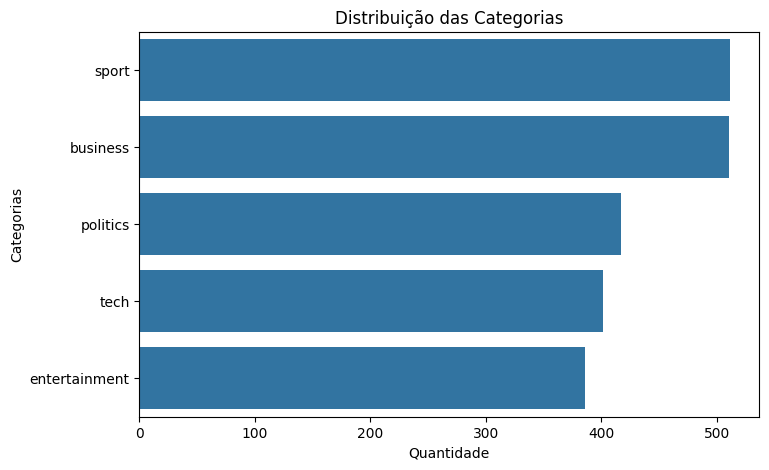

In [ ]:
# Gráfico da Distribuição das Categorias

plt.figure(figsize=(8,5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribuição das Categorias')
plt.xlabel('Quantidade')
plt.ylabel('Categorias')
plt.savefig('distro_category.png', bbox_inches='tight', dpi=600)
plt.show()


b) Histograma e Boxplot para comprimento dos textos

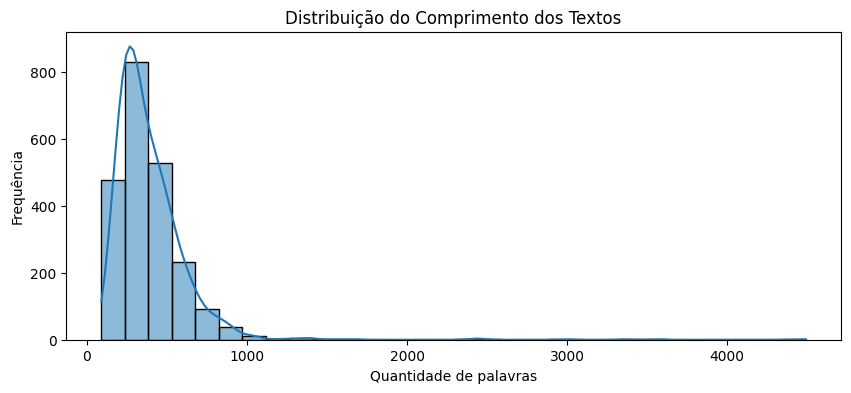

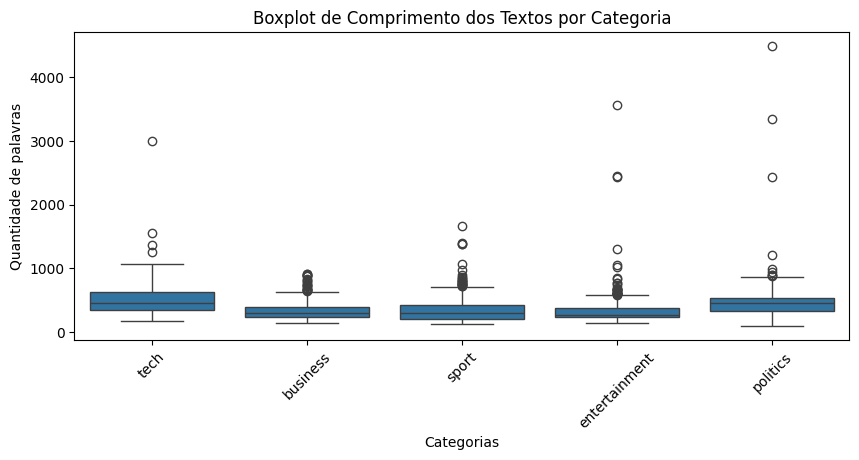

In [ ]:
# Gráficos do Histograma e Boxplot
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Histograma
plt.figure(figsize=(10,4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribuição do Comprimento dos Textos')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Frequência')
plt.savefig('hist_length.png', bbox_inches='tight', dpi=600)
plt.show()

# Boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x='category', y='text_length', data=df)
# plt.title('Boxplot de Comprimento dos Textos por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Quantidade de palavras')
plt.xticks(rotation=45)
plt.savefig('boxplot_length.png', bbox_inches='tight', dpi=600)
plt.show()


c) Wordcloud (Nuvem de Palavras)

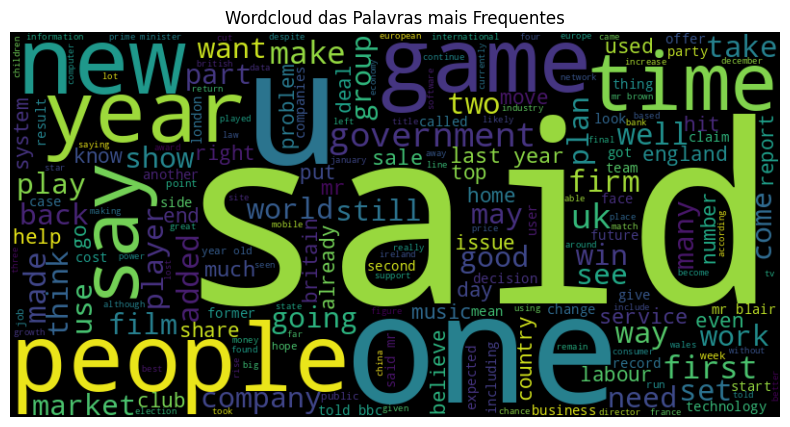

In [ ]:
# Gráfico Nuvem de Palavras
text = ' '.join(df['text']).lower()
words = [word for word in text.split() if word not in stop_words]

wordcloud = WordCloud(width=800, height=400).generate(' '.join(words))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud das Palavras mais Frequentes')
plt.savefig('wordcloud.png', bbox_inches='tight', dpi=600)
plt.show()


d) Distribuição de N-grams (ex.: bigramas)

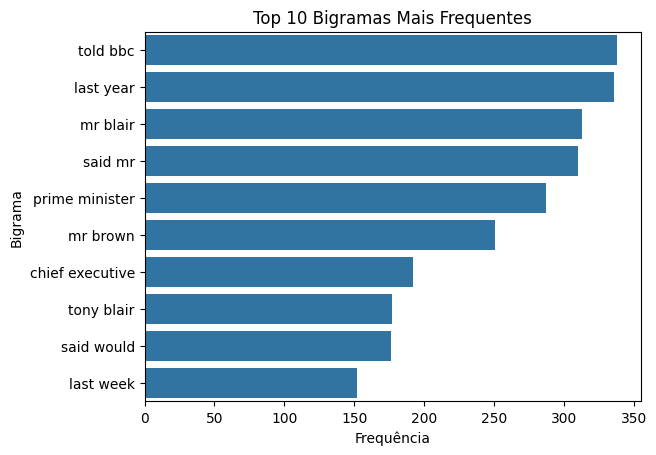

In [ ]:
# Gráfico da Distribuição de N=grams
bigrams = list(ngrams(words, 2))
bigram_counts = Counter(bigrams).most_common(10)

bigram_df = pd.DataFrame(bigram_counts, columns=['bigram', 'count'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))

sns.barplot(y='bigram', x='count', data=bigram_df)
plt.title('Top 10 Bigramas Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Bigrama')
plt.savefig('top_bigrams.png', bbox_inches='tight', dpi=600)
plt.show()


4. Aplicando a técnica RAG (Retrieval-Augmented Generation)

a) Criação dos embeddings dos textos

In [ ]:
# # model = SentenceTransformer('all-MiniLM-L6-v2')

# # import os
# # os.environ["HF_HUB_OFFLINE"] = "HF_TOKEN"
# # model = SentenceTransformer("path/to/all-MiniLM-L6-v2")

# model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", token=False)

# # Criando embeddings
# embeddings = model.encode(df['text'].tolist())
# print(embeddings)

# # Criação do índice FAISS
# dimension = embeddings.shape[1]
# index = faiss.IndexFlatL2(dimension)
# index.add(np.array(embeddings))

In [ ]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", token=False)

# criando embeddings
embeddings = model.encode(df['text'].tolist())
print(embeddings)

# criação do índice FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.00155385 -0.06727464  0.01117423 ... -0.0152122  -0.06372412
   0.08455713]
 [-0.08354732  0.05948403 -0.01319562 ... -0.0931588  -0.00245719
   0.02124288]
 [-0.0559619  -0.00848111 -0.0258433  ... -0.05602714  0.04389466
  -0.04699634]
 ...
 [ 0.02721177 -0.13634135  0.02696489 ... -0.09203073 -0.07737128
  -0.00781306]
 [ 0.04637071 -0.0359611   0.06527064 ...  0.0457666  -0.01624832
   0.0487308 ]
 [-0.02106428  0.08746812 -0.06882966 ... -0.06333217 -0.09086658
   0.05121989]]


b) Realizar busca semântica com RAG

In [ ]:
def retrieve_documents(question, top_k=5):
    query_embedding = model.encode([question])
    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]]

# exemplo teste:
query = "What happened recently in UK politics?"
retrieved_docs = retrieve_documents(query)
print(retrieved_docs[['category', 'text']])


      category                                               text
1174  politics  what really divides the parties so what is the...
638   politics  could rivalry overshadow election  tony blair ...
1208  politics  blair looks to election campaign tony blair s ...
1103  politics  poll idols  face first hurdles vote for me - i...
2059  politics  blair and brown criticised by mps labour mps h...


In [ ]:
# Exemple2:
# query = "What the inferency or abstract the last five articles about technology?"
query = "Please provide a one-paragraph summary of your interpretation of the last five technology articles?"
retrieved_docs = retrieve_documents(query)
print(retrieved_docs[['category', 'text']])

     category                                               text
1433     tech  when technology gets personal in 2020  whippin...
635      tech  more power to the people says hp the digital r...
1936     tech  more power to the people says hp the digital r...
2174     tech  lifestyle  governs mobile choice  faster  bett...
508      tech  when invention turns to innovation it is unlik...


**Sem RAG**

In [ ]:
def retrieve_documents_semRAG(question, top_k=5):
    query_embedding = model.encode([question])
    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]]

# Exemplo:
query = "What happened recently in UK politics?"
retrieved_docs = retrieve_documents_semRAG(query)
print(retrieved_docs[['category', 'text']])

      category                                               text
1174  politics  what really divides the parties so what is the...
638   politics  could rivalry overshadow election  tony blair ...
1208  politics  blair looks to election campaign tony blair s ...
1103  politics  poll idols  face first hurdles vote for me - i...
2059  politics  blair and brown criticised by mps labour mps h...


**Sem utilizar técnica de geração textual (RAG). Apenas a recuperação semântica baseada em embeddings e similaridade:**

In [ ]:

from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd

# Carrega o modelo de embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Dataset de textos
df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")

# Geração dos embeddings dos documentos
corpus = df['text'].tolist()
document_embeddings = model.encode(corpus, show_progress_bar=True)

# Criação do índice FAISS
index = faiss.IndexFlatL2(document_embeddings.shape[1])
index.add(np.array(document_embeddings))


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

**Função de busca semântica sem RAG**

In [ ]:
def semantic_search(query, top_k=5):
    # Codifica a consulta como embedding
    query_embedding = model.encode([query])
    # Busca os top_k documentos mais próximos no índice FAISS
    distances, indices = index.search(query_embedding, top_k)
    # Retorna os documentos mais semelhantes
    return df.iloc[indices[0]]


**Executar a busca**

In [ ]:
query = "What happened recently in UK politics?"
results = semantic_search(query, top_k=5)
print(results[['category', 'text']])


      category                                               text
1174  politics  what really divides the parties so what is the...
638   politics  could rivalry overshadow election  tony blair ...
1208  politics  blair looks to election campaign tony blair s ...
1103  politics  poll idols  face first hurdles vote for me - i...
2059  politics  blair and brown criticised by mps labour mps h...


c) Gerar respostas com LLM (Opcional usando OpenAI GPT)

In [ ]:
import openai
import os
from google.colab import userdata

# openai.api_key = 'SUA_API_KEY'
# openai.api_key = 'OPENAI_TOKEN'
# openai.api_key = userdata.get('OPENAI_API_KEY')
openai.api_key = userdata.get('OPENAI_TOKEN')

os.environ["API_TOKEN"] = userdata.get('OPENAI_TOKEN')


def generate_answer(question, context_texts):
    prompt = f"""
    Context: {' '.join(context_texts)}

    Question: {question}

    Answer:
    """

    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[{'role': 'user', 'content': prompt}]
    )

    return response['choices'][0]['message']['content']

# Exemplo prático
contexts = retrieved_docs['text'].tolist()
# contexts = retrieve_documents['text'].tolist()
answer = generate_answer(query, contexts)
print(answer)

RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.

## **Tarefa de Classificação com BBC News:**

**Objetivo:** Classificar textos de notícias em categorias (ex.: política, negócios, esportes, tecnologia, entretenimento).

**Estrutura do dataset:**

*   Coluna text: Texto integral das notícias.
*   Coluna category: Rótulo da classe de cada notícia.

**Tipo de Classificação:** Multiclasse.

**Exemplo de classes:**

*   business
*   politics
*   sport
*   tech
*   entertainment

Exemplo usando Python (Scikit-learn):

In [ ]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Dividindo dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['category'], test_size=0.3, random_state=42
)

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Classificação usando Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Avaliando o modelo
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.97      0.95      0.96       164
entertainment       1.00      0.94      0.97       113
     politics       0.93      0.99      0.96       113
        sport       0.98      1.00      0.99       146
         tech       0.97      0.97      0.97       132

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



### **Como combinar RAG com Classificação?**

Embora RAG seja tradicionalmente usado para geração textual baseada em recuperação, é possível usá-lo de maneira indireta para auxiliar na tarefa de classificação:

**Usar embeddings de RAG para aprimorar a representação dos textos:**
Os embeddings usados no RAG (ex.: Sentence-BERT) podem ser diretamente usados

*   como entrada para classificadores mais avançados (ex.: Redes Neurais, SVM, ou Random Forest).

In [ ]:
# Embeddings
embeddings = model.encode(df['text'].tolist())

# Classificação usando embeddings com Random Forest
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df['category'], test_size=0.3, random_state=42
)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.94      0.95      0.95       164
entertainment       0.97      0.93      0.95       113
     politics       0.95      0.92      0.93       113
        sport       0.95      0.99      0.97       146
         tech       0.96      0.95      0.96       132

     accuracy                           0.95       668
    macro avg       0.95      0.95      0.95       668
 weighted avg       0.95      0.95      0.95       668



## **Passo a Passo Completo em Python no Google Colab**

**1. Instalação e importação das bibliotecas**

In [ ]:
# Instalar bibliotecas necessárias
!pip install pandas numpy matplotlib seaborn nltk wordcloud sentence-transformers scikit-learn faiss-cpu


In [ ]:
# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sentence_transformers import SentenceTransformer
import faiss

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2. Carregar o Dataset BBC News**

In [ ]:
# Carregar dataset diretamente do link CSV
url = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
df = pd.read_csv(url)

# Exibir primeiras linhas
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


**3. Análise Exploratória de Dados (EDA)**

3.1. Estrutura do Dataset

In [ ]:
print(f"Forma dos dados: {df.shape}")
print("Categorias disponíveis:", df['category'].unique())
df.info()


Forma dos dados: (2225, 2)
Categorias disponíveis: ['tech' 'business' 'sport' 'entertainment' 'politics']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


3.2. Distribuição das Categorias (Gráfico de barras)

/tmp/ipython-input-42-1588237986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')


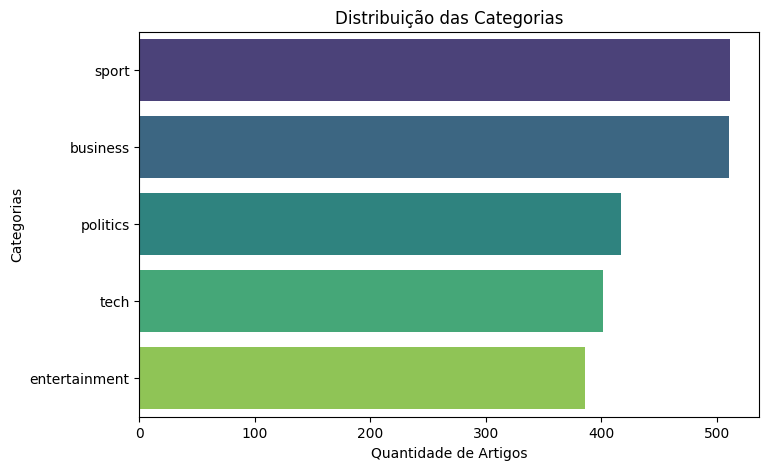

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')
plt.title('Distribuição das Categorias')
plt.xlabel('Quantidade de Artigos')
plt.ylabel('Categorias')
plt.savefig('distro_category2.png', bbox_inches='tight', dpi=600)
plt.show()


3.3. Distribuição do Comprimento dos Textos (Histograma e Boxplot)

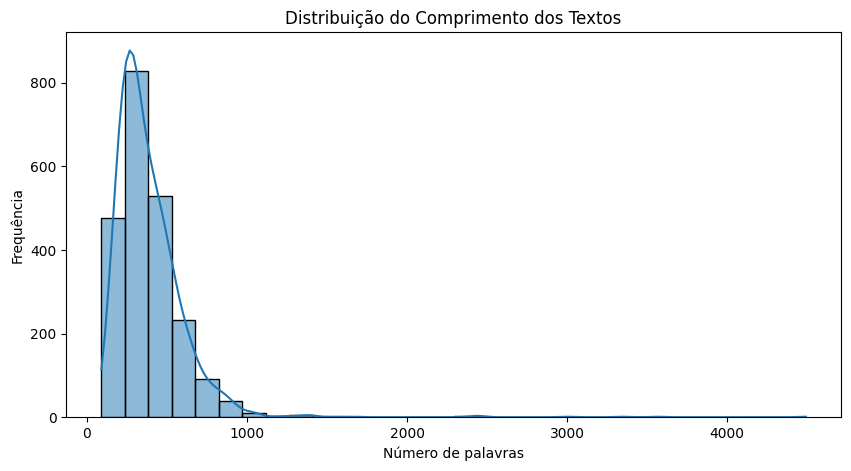

/tmp/ipython-input-43-1146902369.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='text_length', data=df, palette='pastel')


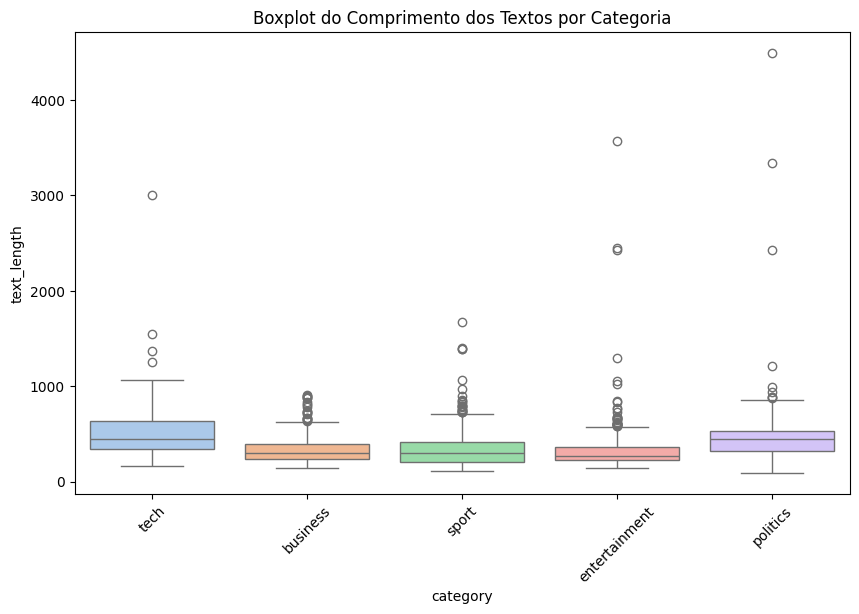

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribuição do Comprimento dos Textos')
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')
plt.savefig('hist_length2.png', bbox_inches='tight', dpi=600)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='text_length', data=df, palette='pastel')
plt.title('Boxplot do Comprimento dos Textos por Categoria')
plt.xticks(rotation=45)
plt.savefig('boxplot_length2.png', bbox_inches='tight', dpi=600)
plt.show()


3.4. Nuvem de Palavras (Wordcloud)

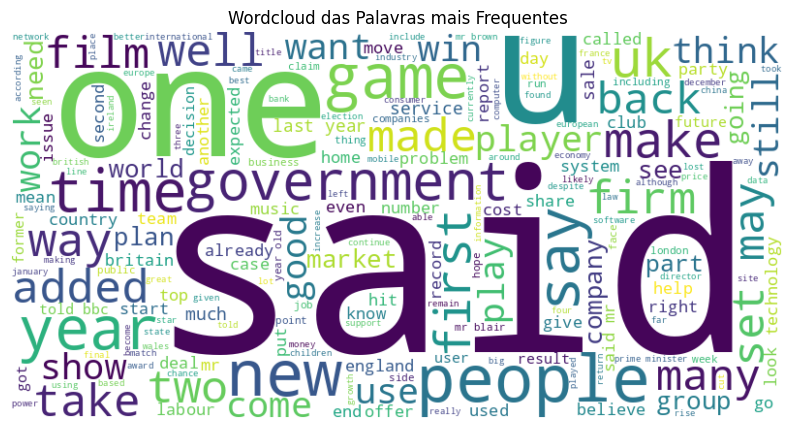

In [ ]:
text = ' '.join(df['text']).lower()
filtered_words = [word for word in text.split() if word not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud das Palavras mais Frequentes')
plt.savefig('wordcloud2.png', bbox_inches='tight', dpi=600)
plt.show()


3.5. Bigramas Mais Frequentes (N-Grams)

/tmp/ipython-input-45-4235865649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Bigram', x='Contagem', data=bigram_df, palette='coolwarm')


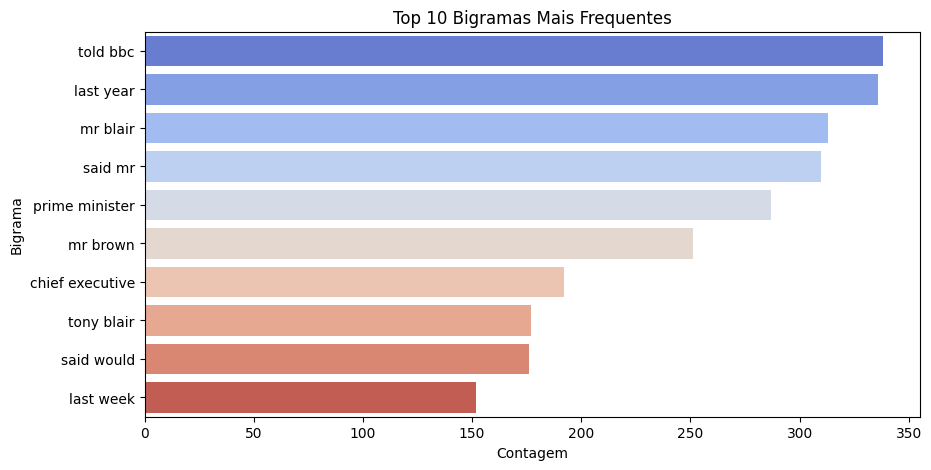

In [ ]:
from nltk.util import ngrams

bigrams = list(ngrams(filtered_words, 2))
bigram_counts = Counter(bigrams).most_common(10)

bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Contagem'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10,5))
sns.barplot(y='Bigram', x='Contagem', data=bigram_df, palette='coolwarm')
plt.title('Top 10 Bigramas Mais Frequentes')
plt.xlabel('Contagem')
plt.ylabel('Bigrama')
plt.savefig('top_bigrams2.png', bbox_inches='tight', dpi=600)
plt.show()


/tmp/ipython-input-46-3446791637.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Bigram', x='Contagem', data=bigram_df, palette='coolwarm')


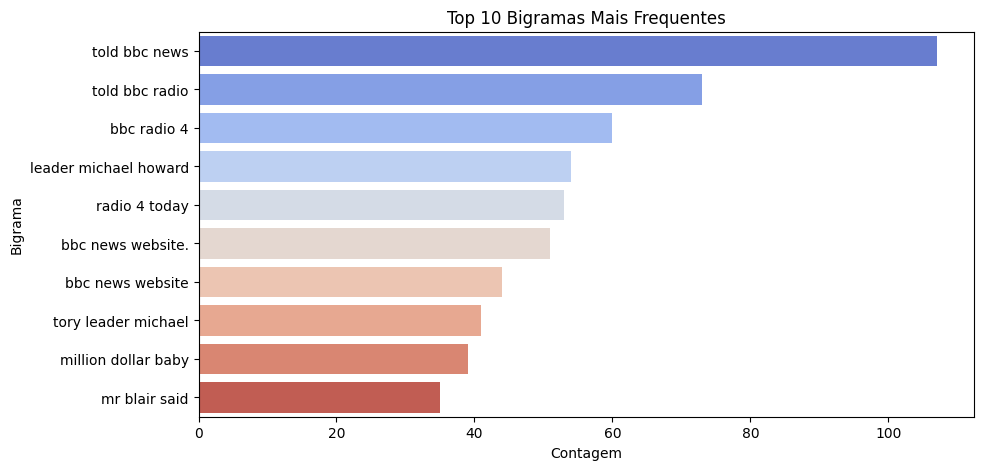

In [ ]:
from nltk.util import ngrams

bigrams = list(ngrams(filtered_words, 3))
bigram_counts = Counter(bigrams).most_common(10)

bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Contagem'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(10,5))
sns.barplot(y='Bigram', x='Contagem', data=bigram_df, palette='coolwarm')
plt.title('Top 10 Bigramas Mais Frequentes')
plt.xlabel('Contagem')
plt.ylabel('Bigrama')
plt.savefig('top_trigrams2.png', bbox_inches='tight', dpi=600)
plt.show()

**4. Aplicação da Técnica RAG (embeddings com Sentence-BERT)**

4.1. Criação dos Embeddings

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Criando embeddings
embeddings = model.encode(df['text'].tolist())


4.2. Criação do índice de busca semântica (FAISS)

In [ ]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))


4.3. Exemplo de Recuperação (RAG simplificado)

In [ ]:
def retrieve_docs(query, top_k=5):
    query_embedding = model.encode([query])
    distances, indices = index.search(query_embedding, top_k)
    return df.iloc[indices[0]]

# Exemplo
# question = "What recent technology developments were reported?"
question = "What the inferency or abstract the last five articles about technology?"
results = retrieve_docs(question)

print(results[['category', 'text']].head())


     category                                               text
508      tech  when invention turns to innovation it is unlik...
1433     tech  when technology gets personal in 2020  whippin...
635      tech  more power to the people says hp the digital r...
1936     tech  more power to the people says hp the digital r...
2174     tech  lifestyle  governs mobile choice  faster  bett...


**5. Classificação Textual usando Embeddings**

5.1. Divisão dos Dados (Treinamento e Teste)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df['category'], test_size=0.3, random_state=42
)


5.2. Treinamento com Random Forest (classificador robusto)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Previsões
y_pred = clf.predict(X_test)

# Avaliação detalhada
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.94      0.93      0.93       164
entertainment       0.97      0.94      0.95       113
     politics       0.94      0.92      0.93       113
        sport       0.95      0.99      0.97       146
         tech       0.95      0.96      0.95       132

     accuracy                           0.95       668
    macro avg       0.95      0.95      0.95       668
 weighted avg       0.95      0.95      0.95       668



5.3 Relatório

In [ ]:
# Importação adicional necessária
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculando as métricas de classificação
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=clf.classes_)

# Criando dataframe para visualização
metrics_df = pd.DataFrame({
    'Categoria': clf.classes_,
    'Precisão': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

print("Acurácia geral do modelo: {:.2f}%".format(accuracy * 100))
# print("\n"+metrics_df)
print(metrics_df)


Acurácia geral do modelo: 94.91%
       Categoria  Precisão    Recall  F1-Score
0       business  0.938272  0.926829  0.932515
1  entertainment  0.972477  0.938053  0.954955
2       politics  0.936937  0.920354  0.928571
3          sport  0.953947  0.993151  0.973154
4           tech  0.947761  0.962121  0.954887


1. Gráfico de Acurácia Geral

/tmp/ipython-input-51-475171536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Acurácia Geral'], y=[accuracy*100], palette='Greens')


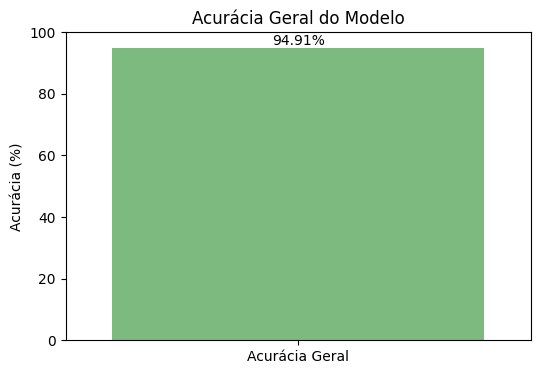

In [ ]:
# Gráfico de Acurácia Geral
plt.figure(figsize=(6,4))
sns.barplot(x=['Acurácia Geral'], y=[accuracy*100], palette='Greens')
plt.ylim(0,100)
plt.ylabel('Acurácia (%)')
plt.title('Acurácia Geral do Modelo')
for i in range(1):
    plt.text(i, accuracy*100 + 1, f'{accuracy*100:.2f}%', ha='center')
    plt.savefig('acuracia_geral2.png', bbox_inches='tight', dpi=600)
plt.show()


2. Gráfico de Precisão por Categoria

/tmp/ipython-input-52-4116436001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Precisão', data=metrics_df, palette='Blues_d')


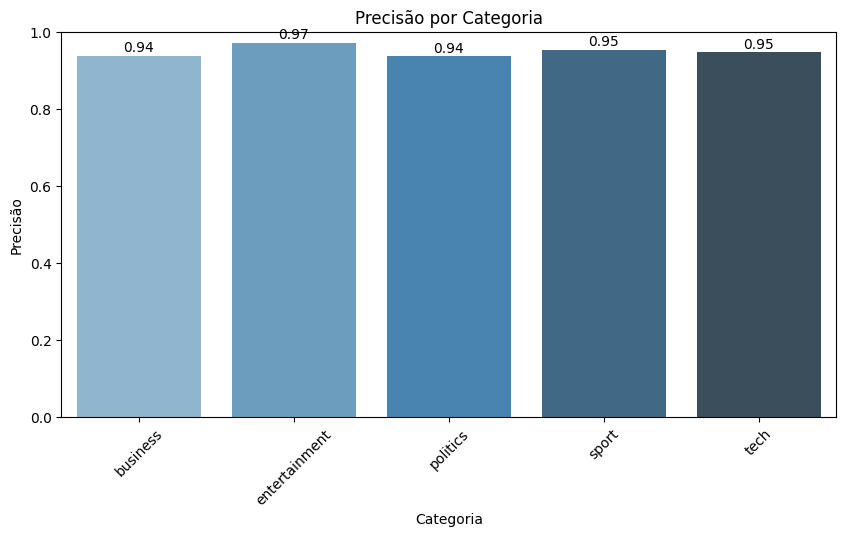

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Categoria', y='Precisão', data=metrics_df, palette='Blues_d')
plt.ylim(0,1)
plt.title('Precisão por Categoria')
plt.ylabel('Precisão')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
for i, p in enumerate(precision):
    plt.text(i, p + 0.01, f'{p:.2f}', ha='center')
    plt.savefig('precisao_por_categoria2.png', bbox_inches='tight', dpi=600)
plt.show()


3. Gráfico de Recall por Categoria

/tmp/ipython-input-53-2457437827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Recall', data=metrics_df, palette='Oranges_d')


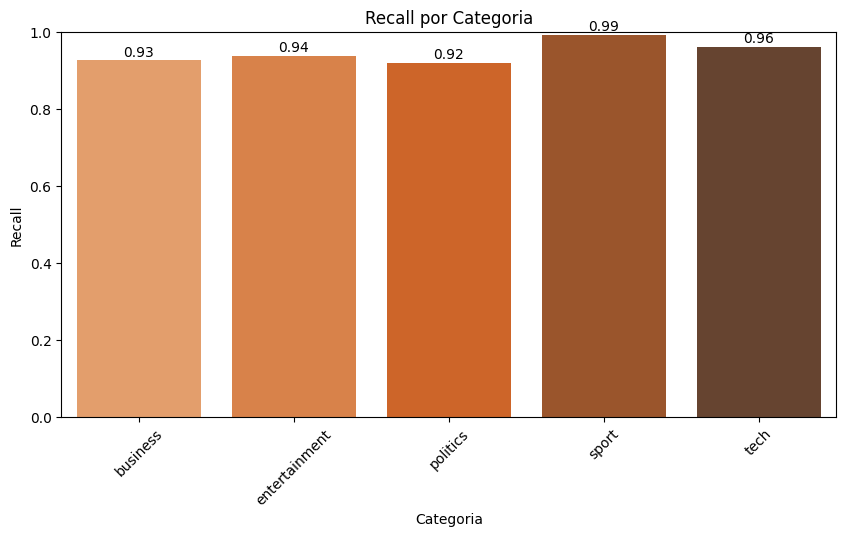

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Categoria', y='Recall', data=metrics_df, palette='Oranges_d')
plt.ylim(0,1)
plt.title('Recall por Categoria')
plt.ylabel('Recall')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
for i, r in enumerate(recall):
    plt.text(i, r + 0.01, f'{r:.2f}', ha='center')
    plt.savefig('recall_por_categoria2.png', bbox_inches='tight', dpi=600)
plt.show()


4. Gráfico de F1-Score por Categoria

/tmp/ipython-input-54-4175379917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='F1-Score', data=metrics_df, palette='Purples_d')


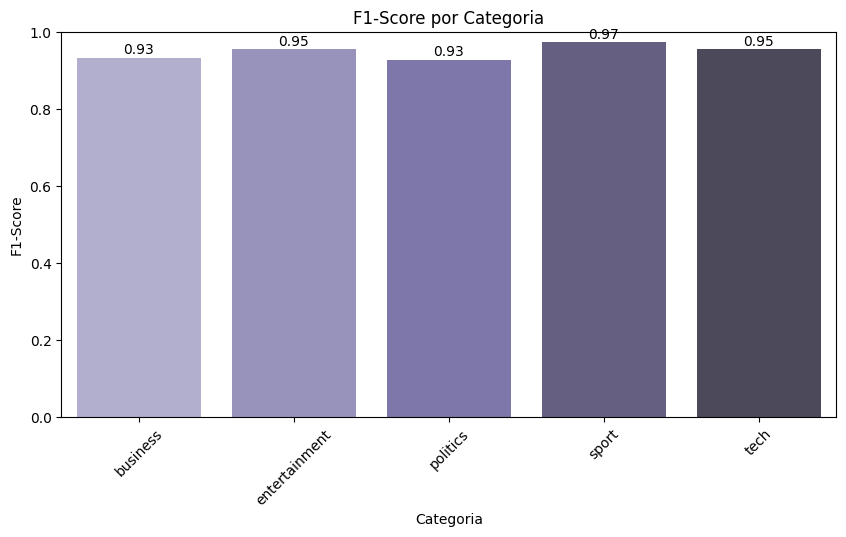

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Categoria', y='F1-Score', data=metrics_df, palette='Purples_d')
plt.ylim(0,1)
plt.title('F1-Score por Categoria')
plt.ylabel('F1-Score')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
for i, f1 in enumerate(f1_score):
    plt.text(i, f1 + 0.01, f'{f1:.2f}', ha='center')
    plt.savefig('f1_score_por_categoria2.png', bbox_inches='tight', dpi=600)
plt.show()


**6. Avaliação gráfica dos Resultados**

Matriz de Confusão

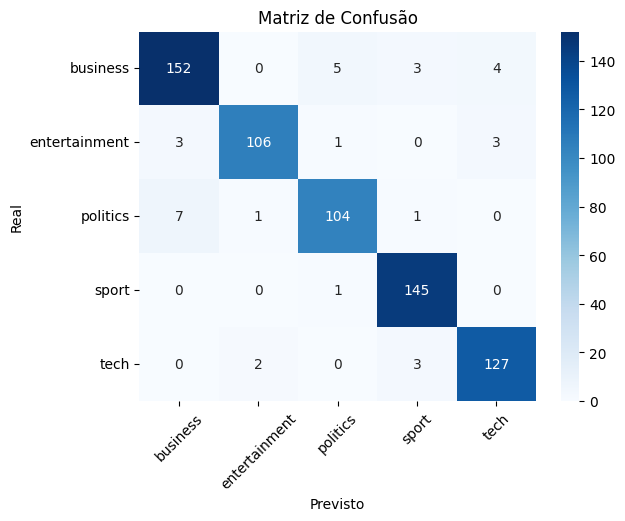

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('matriz_confusao2.png', bbox_inches='tight', dpi=600)
plt.show()


Guia prático **completo e detalhado** (sem embeddings) para realizar uma **análise exploratória (EDA), visualizações gráficas** e **classificação textual** dos datasets **BBC News**.

**1. Configuração inicial no Google Colab**

In [ ]:
# Instalar bibliotecas necessárias
!pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn


In [ ]:
# Importações essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2. Carregar e Explorar os Datasets**

2.1. Dataset BBC News

In [ ]:
url_bbc = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
df_bbc = pd.read_csv(url_bbc)
print(df_bbc.head())


        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


**3. EDA (Análise Exploratória) – Exemplo para BBC News**

/tmp/ipython-input-4-214033249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df_bbc, palette='Set2')


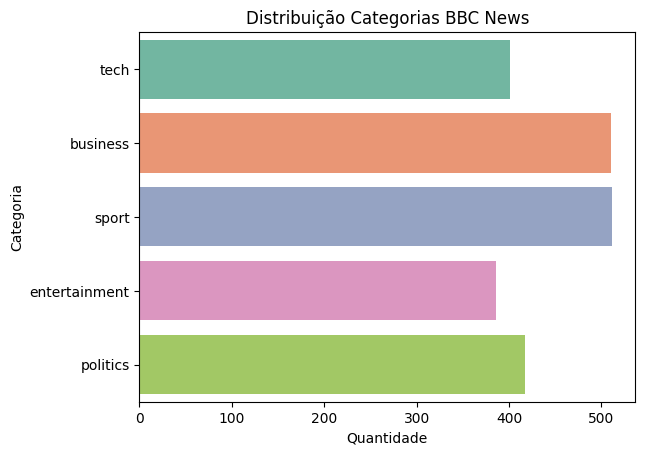

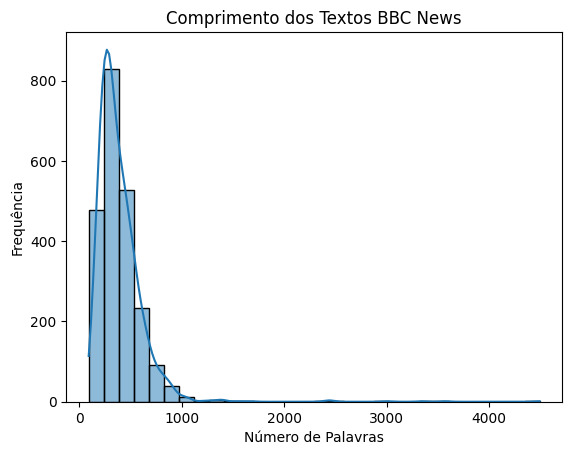

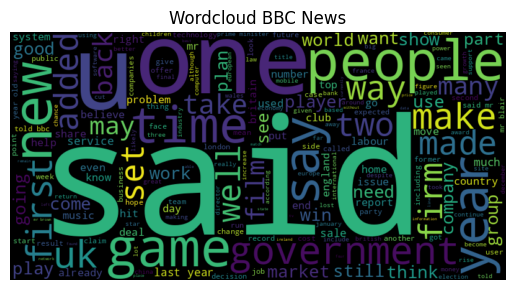

In [ ]:
# Distribuição das categorias
sns.countplot(y='category', data=df_bbc, palette='Set2')
plt.title('Distribuição Categorias BBC News')
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.savefig('distro_category_bbc.png', bbox_inches='tight', dpi=600)
plt.show()

# Comprimento dos textos
df_bbc['text_length'] = df_bbc['text'].apply(lambda x: len(x.split()))
sns.histplot(df_bbc['text_length'], bins=30, kde=True)
plt.title('Comprimento dos Textos BBC News')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.savefig('hist_length_bbc.png', bbox_inches='tight', dpi=600)
plt.show()

# Wordcloud
text = ' '.join(df_bbc['text']).lower()
filtered_words = [word for word in text.split() if word not in stop_words]
wordcloud = WordCloud(width=800, height=400).generate(' '.join(filtered_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud BBC News')
plt.savefig('wordcloud_bbc.png', bbox_inches='tight', dpi=600)
plt.show()


**4. Classificação sem Embeddings (TF-IDF)**

In [ ]:
# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(
    df_bbc['text'], df_bbc['category'], test_size=0.3, random_state=42
)

# Vetorização TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Classificador Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_vec, y_train)
y_pred = clf_rf.predict(X_test_vec)

# Avaliação
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     business       0.92      0.95      0.93       164
entertainment       0.98      0.92      0.95       113
     politics       0.93      0.93      0.93       113
        sport       0.96      0.99      0.97       146
         tech       0.95      0.93      0.94       132

     accuracy                           0.95       668
    macro avg       0.95      0.94      0.95       668
 weighted avg       0.95      0.95      0.95       668



**5. Avaliação gráfica das métricas (exemplo BBC News)**

**Matriz de Confusão**

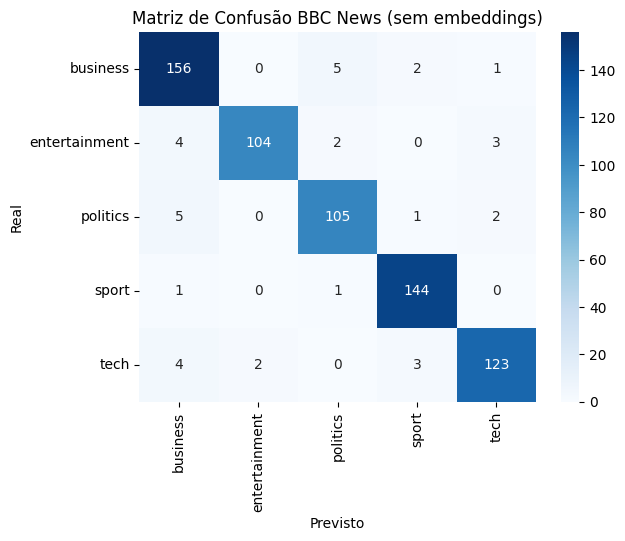

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf_rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_rf.classes_, yticklabels=clf_rf.classes_)
plt.title('Matriz de Confusão BBC News (sem embeddings)')
plt.xlabel('Previsto')
plt.ylabel('Real')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
plt.savefig('matriz_confusao_bbc.png', bbox_inches='tight', dpi=600)
plt.show()


**Precisão, Recall, F1-Score**

Acurácia geral: 94.61%
       Categoria  Precisão    Recall  F1-Score
0       business  0.917647  0.951220  0.934132
1  entertainment  0.981132  0.920354  0.949772
2       politics  0.929204  0.929204  0.929204
3          sport  0.960000  0.986301  0.972973
4           tech  0.953488  0.931818  0.942529


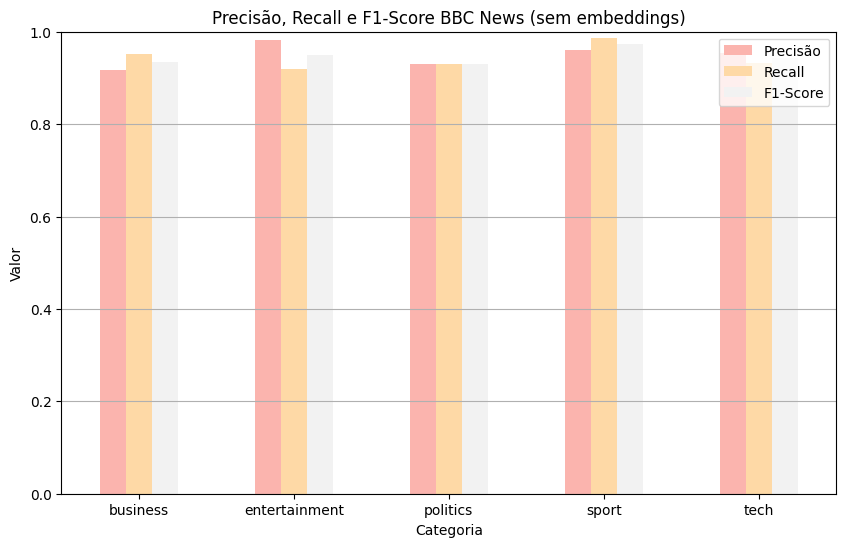

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=clf_rf.classes_)

metrics_df = pd.DataFrame({
    'Categoria': clf_rf.classes_,
    'Precisão': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

print(f"Acurácia geral: {accuracy*100:.2f}%")
print(metrics_df)

# Gráfico das métricas
metrics_df.set_index('Categoria').plot.bar(rot=0, figsize=(10,6), colormap='Pastel1')
plt.title('Precisão, Recall e F1-Score BBC News (sem embeddings)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(axis='y')
plt.savefig('precisao_recall_f1_bbc.png', bbox_inches='tight', dpi=600)
plt.show()


In [ ]:
# Instalação
!pip install pandas numpy seaborn matplotlib nltk wordcloud scikit-learn sentence-transformers tensorflow keras

# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sentence_transformers import SentenceTransformer
import tensorflow as tf

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
url_bbc = 'https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv'
df = pd.read_csv(url_bbc)
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


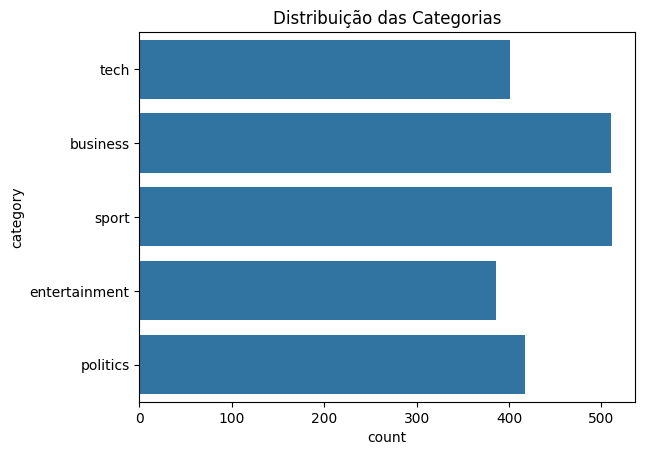

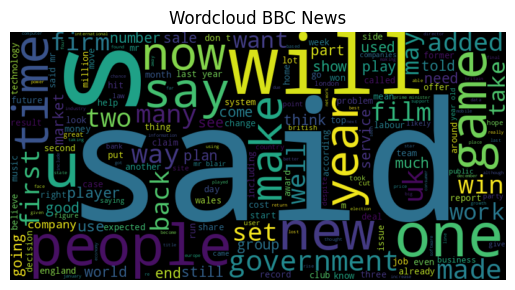

In [ ]:
# Distribuição categorias
sns.countplot(y='category', data=df)
plt.title('Distribuição das Categorias')
plt.show()

# Wordcloud
text = ' '.join(df['text']).lower()
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud BBC News')
plt.show()


## **4. Preparação dos dados**

**Sem embeddings (TF-IDF)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


**Com embeddings (Sentence-BERT)**

In [ ]:
# model_emb = SentenceTransformer('all-MiniLM-L6-v2')
model_emb = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", token=False)

X_embeddings = model_emb.encode(df['text'])

X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_embeddings, df['category'], test_size=0.3, random_state=42
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **5. Classificação sem Embeddings (Naive Bayes e SVM)**

**Naive Bayes**

In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)
y_pred_nb = nb_clf.predict(X_test_tfidf)
print("Naive Bayes sem embeddings:\n", classification_report(y_test, y_pred_nb))


Naive Bayes sem embeddings:
                precision    recall  f1-score   support

     business       0.97      0.95      0.96       164
entertainment       1.00      0.94      0.97       113
     politics       0.93      0.99      0.96       113
        sport       0.98      1.00      0.99       146
         tech       0.97      0.97      0.97       132

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



**Support Vector Machines (SVM)**

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_clf.predict(X_test_tfidf)
print("SVM sem embeddings:\n", classification_report(y_test, y_pred_svm))


SVM sem embeddings:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       164
entertainment       0.99      0.97      0.98       113
     politics       0.94      0.99      0.97       113
        sport       0.99      1.00      0.99       146
         tech       1.00      0.98      0.99       132

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



## **6. Classificação com Embeddings (Naive Bayes e SVM)**

**Naive Bayes com embeddings (GaussianNB)**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train_emb, y_train_emb)
y_pred_gnb = gnb_clf.predict(X_test_emb)
print("Naive Bayes com embeddings:\n", classification_report(y_test_emb, y_pred_gnb))


Naive Bayes com embeddings:
                precision    recall  f1-score   support

     business       0.96      0.95      0.96       164
entertainment       0.96      0.96      0.96       113
     politics       0.95      0.92      0.94       113
        sport       0.98      0.99      0.98       146
         tech       0.93      0.97      0.95       132

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



**SVM com embeddings**

In [ ]:
svm_emb_clf = SVC()
svm_emb_clf.fit(X_train_emb, y_train_emb)
y_pred_svm_emb = svm_emb_clf.predict(X_test_emb)
print("SVM com embeddings:\n", classification_report(y_test_emb, y_pred_svm_emb))


SVM com embeddings:
                precision    recall  f1-score   support

     business       0.99      0.95      0.97       164
entertainment       0.98      0.99      0.99       113
     politics       0.96      0.96      0.96       113
        sport       0.97      1.00      0.99       146
         tech       0.98      0.98      0.98       132

     accuracy                           0.98       668
    macro avg       0.98      0.98      0.98       668
 weighted avg       0.98      0.98      0.98       668



## **7. Avaliação gráfica (exemplo: Naive Bayes sem embeddings)**

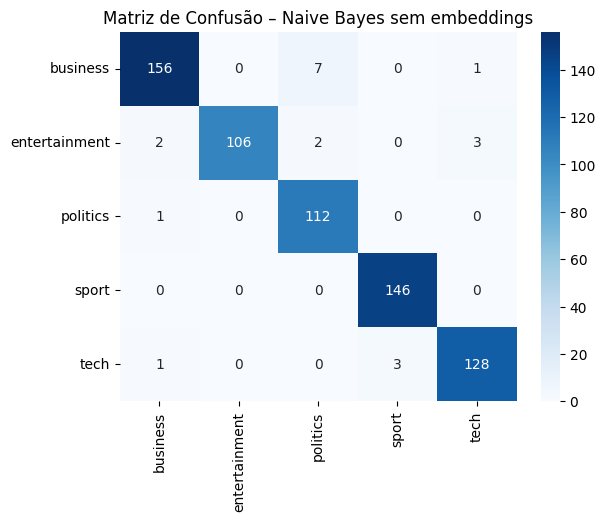

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_clf.classes_)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=nb_clf.classes_, yticklabels=nb_clf.classes_)
plt.title('Matriz de Confusão – Naive Bayes sem embeddings')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_confusion_matrix(y_true, y_pred, labels, title='Matriz de Confusão'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

def plot_metrics(y_true, y_pred, labels, model_name, title_suffix=''):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels)

    df_metrics = pd.DataFrame({
        'Categoria': labels,
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"Acurácia Geral – {model_name} {title_suffix}: {accuracy*100:.2f}%")
    display(df_metrics)

    df_metrics.set_index('Categoria').plot.bar(rot=0, figsize=(10,6))
    plt.title(f'{model_name} – Métricas por Categoria {title_suffix}')
    plt.ylabel('Valor')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()


## **2. Aplicar para Modelos SEM Embeddings (TF-IDF)**

** Random Forest sem embeddings**

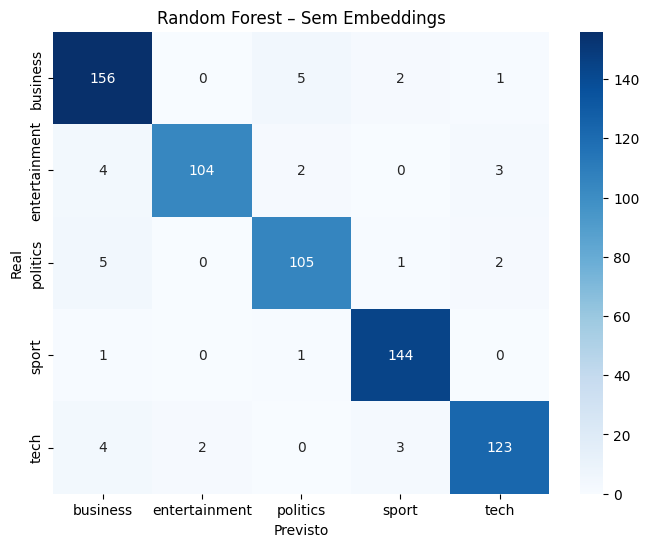

Acurácia Geral – Random Forest (Sem Embeddings): 94.61%


,Categoria,Precisão,Recall,F1-Score
0,business,0.917647,0.951220,0.934132
1,entertainment,0.981132,0.920354,0.949772
2,politics,0.929204,0.929204,0.929204
3,sport,0.960000,0.986301,0.972973
4,tech,0.953488,0.931818,0.942529


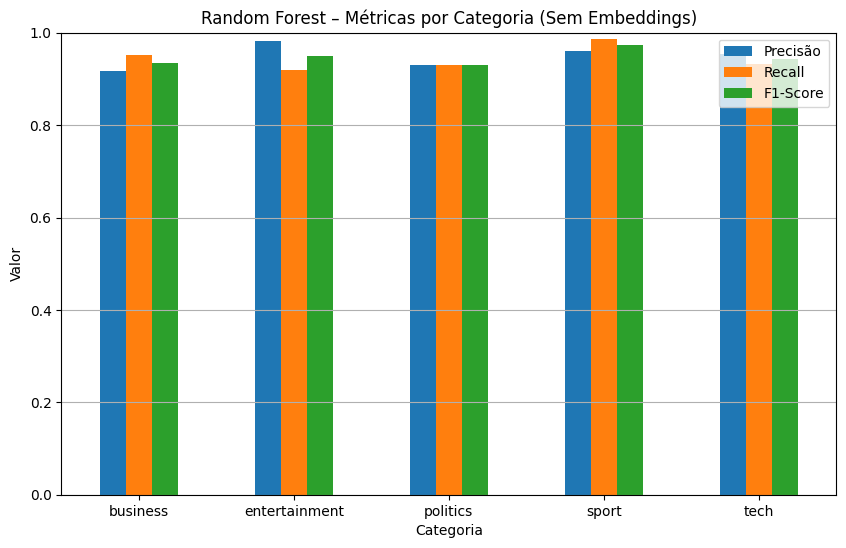

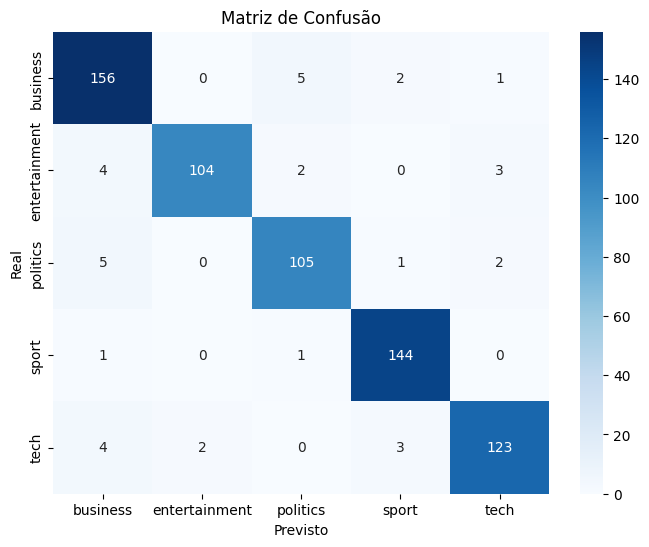

Acurácia Geral – Random Forest : 94.61%


,Categoria,Precisão,Recall,F1-Score
0,business,0.917647,0.951220,0.934132
1,entertainment,0.981132,0.920354,0.949772
2,politics,0.929204,0.929204,0.929204
3,sport,0.960000,0.986301,0.972973
4,tech,0.953488,0.931818,0.942529


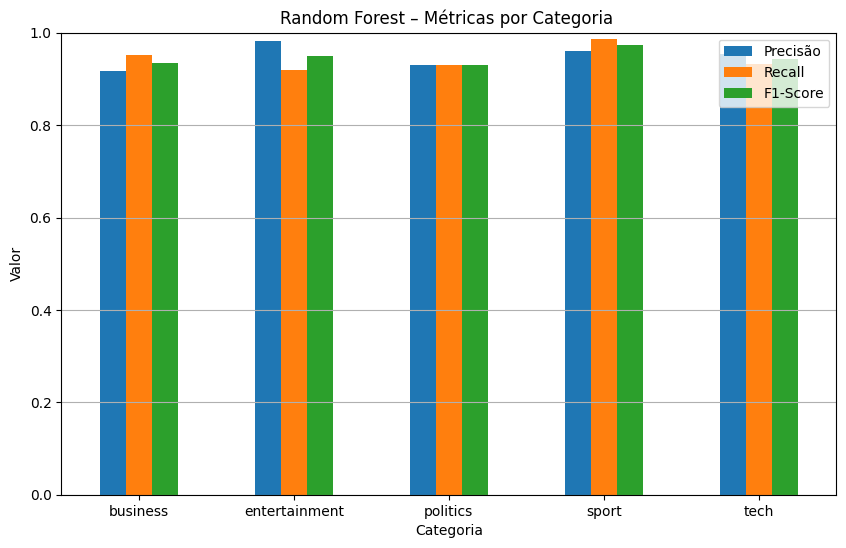

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf = rf_tfidf.predict(X_test_tfidf)

plot_confusion_matrix(y_test, y_pred_rf, labels=rf_tfidf.classes_, title='Random Forest – Sem Embeddings')
plot_metrics(y_test, y_pred_rf, rf_tfidf.classes_, model_name='Random Forest', title_suffix='(Sem Embeddings)')
plot_confusion_matrix(y_test, y_pred_rf, labels=rf_tfidf.classes_, )
plot_metrics(y_test, y_pred_rf, rf_tfidf.classes_, model_name='Random Forest',)
plt.savefig('matriz_rf_tfidf2.png', bbox_inches='tight', dpi=600)


** Naive Bayes sem embeddings**

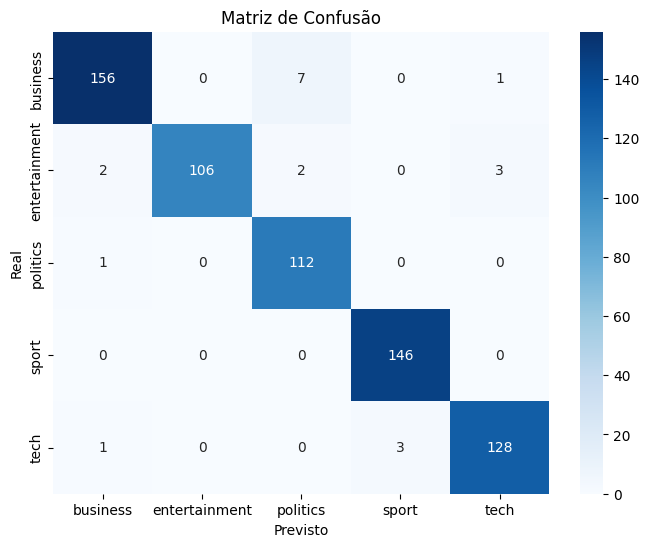

Acurácia Geral – Naive Bayes : 97.01%


,Categoria,Precisão,Recall,F1-Score
0,business,0.975000,0.951220,0.962963
1,entertainment,1.000000,0.938053,0.968037
2,politics,0.925620,0.991150,0.957265
3,sport,0.979866,1.000000,0.989831
4,tech,0.969697,0.969697,0.969697


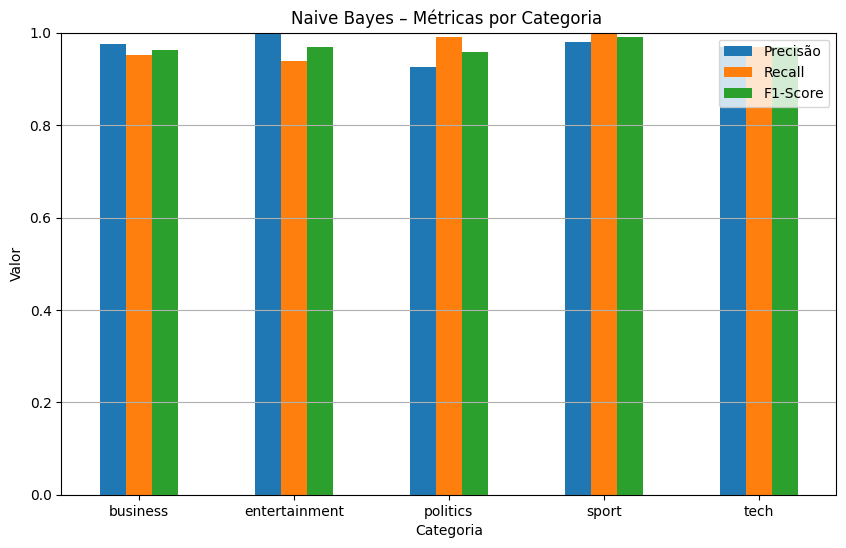

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb = nb_tfidf.predict(X_test_tfidf)

# plot_confusion_matrix(y_test, y_pred_nb, labels=nb_tfidf.classes_, title='Naive Bayes – Sem Embeddings')
# plot_metrics(y_test, y_pred_nb, nb_tfidf.classes_, model_name='Naive Bayes', title_suffix='(Sem Embeddings)')
plot_confusion_matrix(y_test, y_pred_nb, labels=nb_tfidf.classes_, )
plot_metrics(y_test, y_pred_nb, nb_tfidf.classes_, model_name='Naive Bayes', )
plt.savefig('matriz_rf_NB.png', bbox_inches='tight', dpi=300)


**SVM sem embeddings**

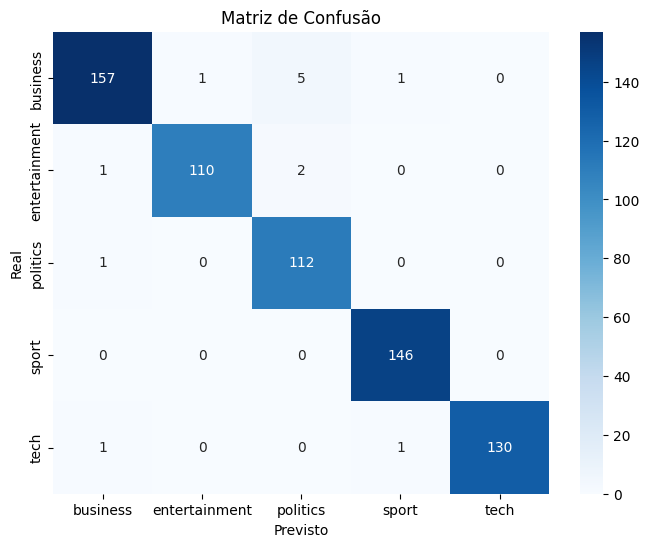

Acurácia Geral – SVM : 98.05%


,Categoria,Precisão,Recall,F1-Score
0,business,0.981250,0.957317,0.969136
1,entertainment,0.990991,0.973451,0.982143
2,politics,0.941176,0.991150,0.965517
3,sport,0.986486,1.000000,0.993197
4,tech,1.000000,0.984848,0.992366


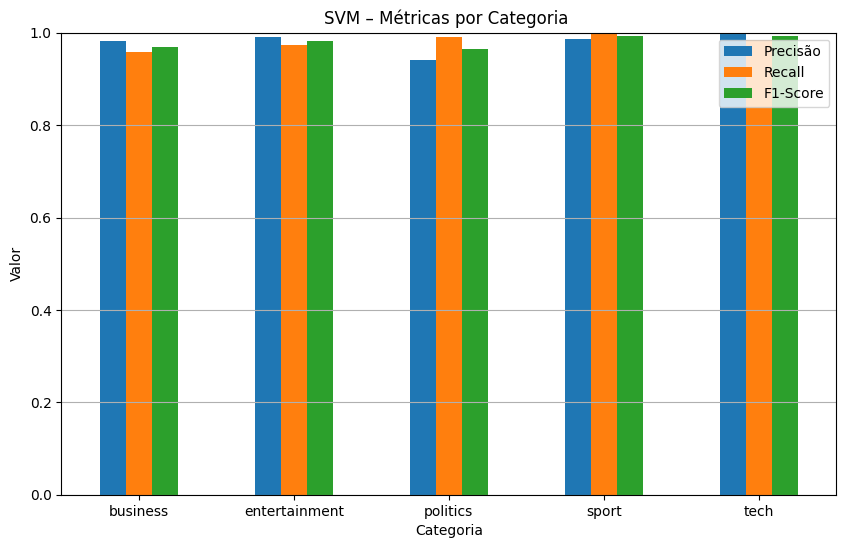

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.svm import SVC

svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_tfidf.predict(X_test_tfidf)

# plot_confusion_matrix(y_test, y_pred_svm, labels=svm_tfidf.classes_, title='SVM – Sem Embeddings')
# plot_metrics(y_test, y_pred_svm, svm_tfidf.classes_, model_name='SVM', title_suffix='(Sem Embeddings)')
plot_confusion_matrix(y_test, y_pred_svm, labels=svm_tfidf.classes_, )
plot_metrics(y_test, y_pred_svm, svm_tfidf.classes_, model_name='SVM', )
plt.savefig('matriz_rf_SVM.png', bbox_inches='tight', dpi=300)


## **3. Aplicar para Modelos COM Embeddings**

**Random Forest com embeddings**

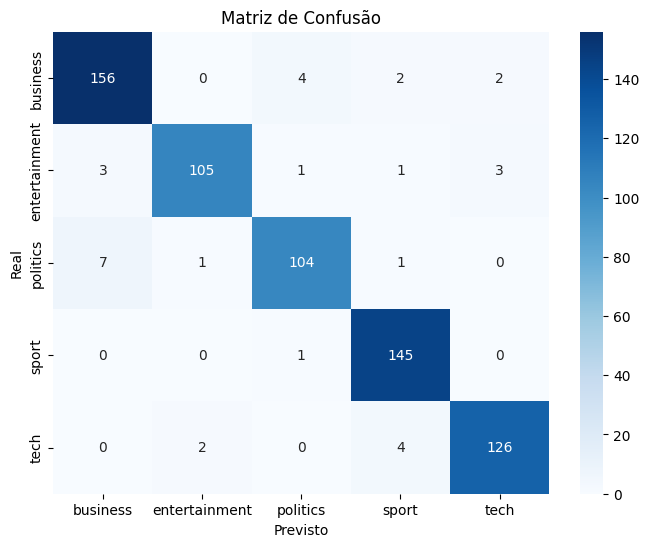

Acurácia Geral – Random Forest : 95.21%


,Categoria,Precisão,Recall,F1-Score
0,business,0.939759,0.951220,0.945455
1,entertainment,0.972222,0.929204,0.950226
2,politics,0.945455,0.920354,0.932735
3,sport,0.947712,0.993151,0.969900
4,tech,0.961832,0.954545,0.958175


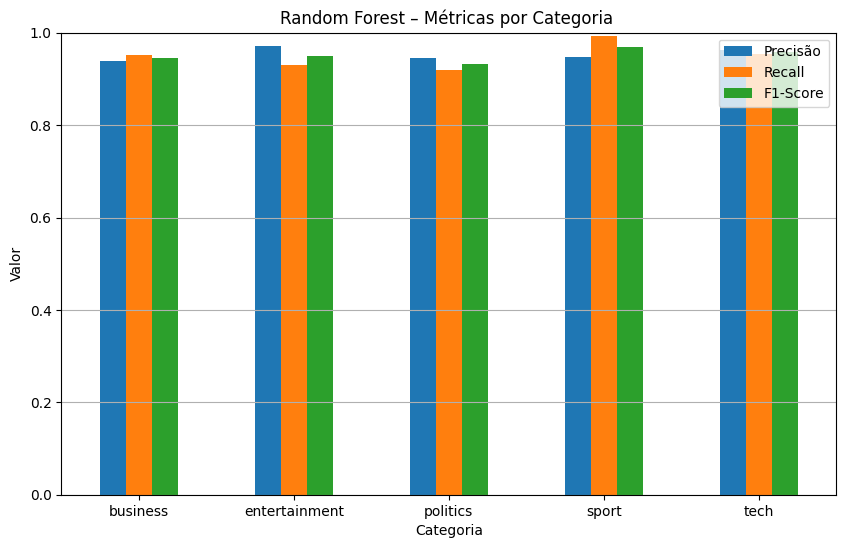

<Figure size 640x480 with 0 Axes>

In [ ]:
rf_emb = RandomForestClassifier(n_estimators=100, random_state=42)
rf_emb.fit(X_train_emb, y_train_emb)
y_pred_rf_emb = rf_emb.predict(X_test_emb)

# plot_confusion_matrix(y_test_emb, y_pred_rf_emb, labels=rf_emb.classes_, title='Random Forest – Com Embeddings')
# plot_metrics(y_test_emb, y_pred_rf_emb, rf_emb.classes_, model_name='Random Forest', title_suffix='(Com Embeddings)')
plot_confusion_matrix(y_test_emb, y_pred_rf_emb, labels=rf_emb.classes_, )
plot_metrics(y_test_emb, y_pred_rf_emb, rf_emb.classes_, model_name='Random Forest', )
plt.savefig('matriz_RF_com.png', bbox_inches='tight', dpi=300)


**Naive Bayes com embeddings**

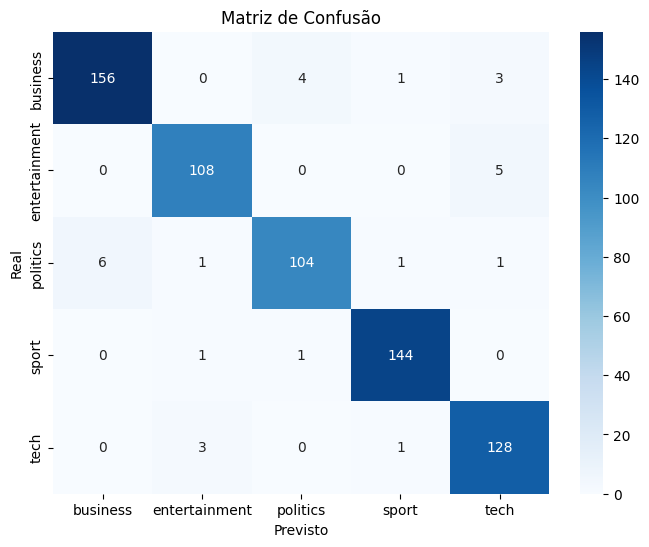

Acurácia Geral – Naive Bayes : 95.81%


,Categoria,Precisão,Recall,F1-Score
0,business,0.962963,0.951220,0.957055
1,entertainment,0.955752,0.955752,0.955752
2,politics,0.954128,0.920354,0.936937
3,sport,0.979592,0.986301,0.982935
4,tech,0.934307,0.969697,0.951673


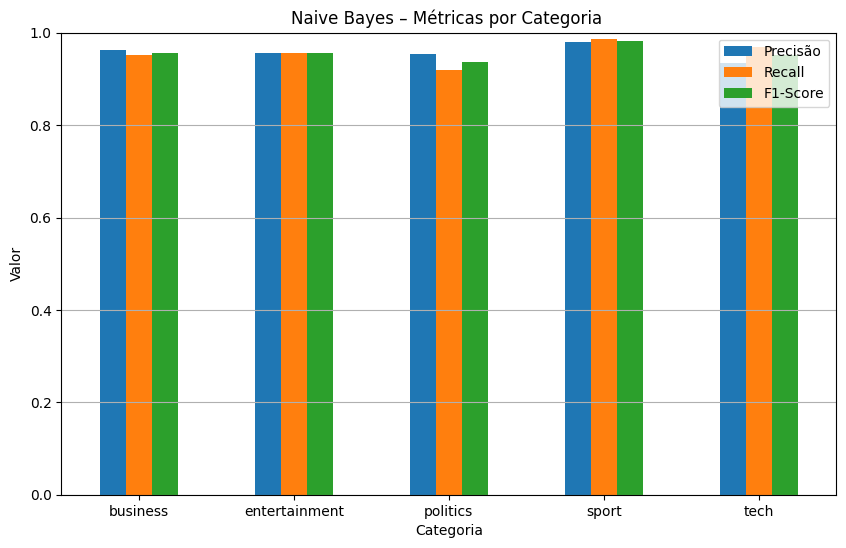

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_emb = GaussianNB()
nb_emb.fit(X_train_emb, y_train_emb)
y_pred_nb_emb = nb_emb.predict(X_test_emb)

# plot_confusion_matrix(y_test_emb, y_pred_nb_emb, labels=nb_emb.classes_, title='Naive Bayes – Com Embeddings')
# plot_metrics(y_test_emb, y_pred_nb_emb, nb_emb.classes_, model_name='Naive Bayes', title_suffix='(Com Embeddings)')
plot_confusion_matrix(y_test_emb, y_pred_nb_emb, labels=nb_emb.classes_, )
plot_metrics(y_test_emb, y_pred_nb_emb, nb_emb.classes_, model_name='Naive Bayes', )
plt.savefig('matriz_NB_com.png', bbox_inches='tight', dpi=300)


**SVM com embeddings**

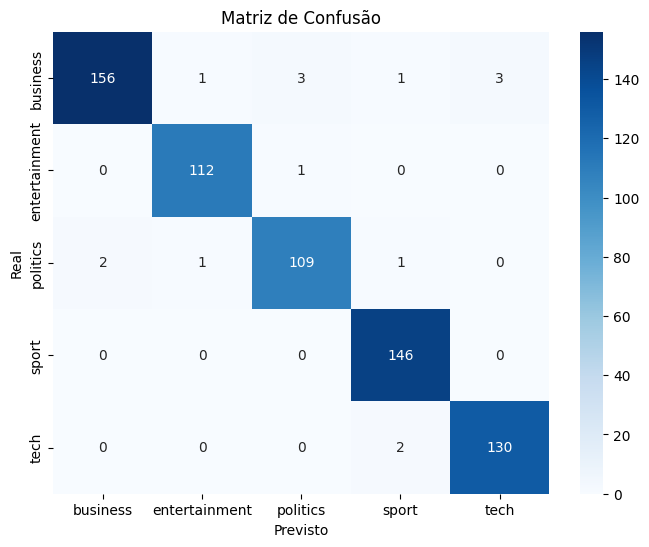

Acurácia Geral – SVM : 97.75%


,Categoria,Precisão,Recall,F1-Score
0,business,0.987342,0.951220,0.968944
1,entertainment,0.982456,0.991150,0.986784
2,politics,0.964602,0.964602,0.964602
3,sport,0.973333,1.000000,0.986486
4,tech,0.977444,0.984848,0.981132


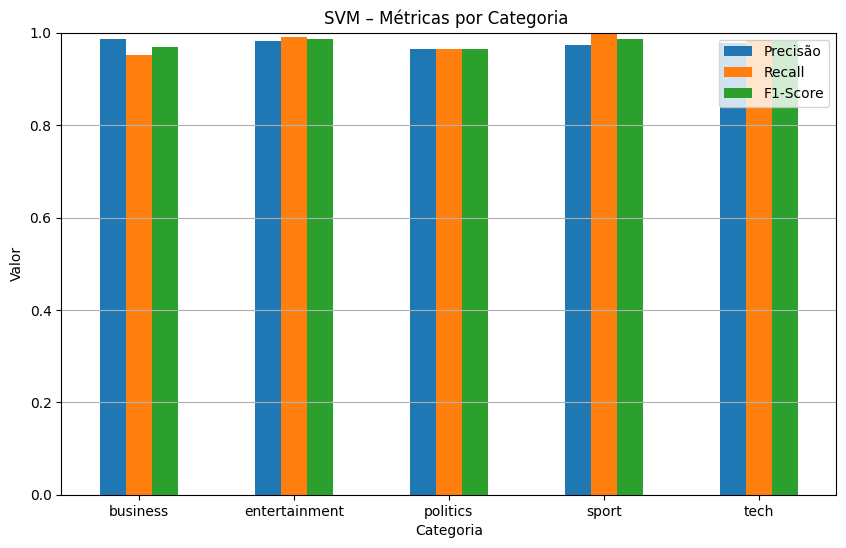

<Figure size 640x480 with 0 Axes>

In [ ]:
svm_emb = SVC()
svm_emb.fit(X_train_emb, y_train_emb)
y_pred_svm_emb = svm_emb.predict(X_test_emb)

# plot_confusion_matrix(y_test_emb, y_pred_svm_emb, labels=svm_emb.classes_, title='SVM – Com Embeddings')
# plot_metrics(y_test_emb, y_pred_svm_emb, svm_emb.classes_, model_name='SVM', title_suffix='(Com Embeddings)')
plot_confusion_matrix(y_test_emb, y_pred_svm_emb, labels=svm_emb.classes_,)
plot_metrics(y_test_emb, y_pred_svm_emb, svm_emb.classes_, model_name='SVM',)
plt.savefig('matriz_SVM_com.png', bbox_inches='tight', dpi=300)
